<a href="https://colab.research.google.com/github/won195/TIL/blob/master/%5B%ED%86%B5%EA%B3%84%EC%B2%ADX%EC%98%A4%EB%8A%98%EC%BD%94%EB%93%9C%5D_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%ED%99%9C%EC%9A%A9_TIP_%E2%91%A0%EA%B5%AD%EA%B0%80%ED%86%B5%EA%B3%84%ED%8F%AC%ED%84%B8(KOSIS)%EC%9E%90%EB%A3%8C%EB%A1%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%93%9C%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

E: Failed to fetch https://cloud.r-project.org/bin/linux/ubuntu/jammy-cran40/Packages.gz  File has unexpected size (44463 != 44653). Mirror sync in progress? [IP: 52.85.151.54 443]
   Hashes of expected file:
    - Filesize:44653 [weak]
    - SHA512:102d88d113b9aebcaf61e2e2daabf4a8237252c73d601253855580424f33b1ef4a304547f3ce0854f5f68034df02b77a28b044271815aa842b46447c0be5a0ce
    - SHA256:14f01f36539176948bbb56b0f8578cd58ca2c907ef03b532db00bd12b2aa040e
    - MD5Sum:f4ddc55faf02197275006697e2531d1f [weak]
   Release file created at: Thu, 26 Oct 2023 01:13:50 +0000
E: Some index files failed to download. They have been ignored, or old ones used instead.


In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [13]:
df_price_index = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/품목별_소비자물가지수_품목성질별_2020100__20231025221113.csv", encoding="utf-8")
df_price_index.shape

(12100, 4)

In [14]:
df_price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     12100 non-null  object 
 1   품목별     12100 non-null  object 
 2   시점      12100 non-null  float64
 3   데이터     12100 non-null  float64
dtypes: float64(2), object(2)
memory usage: 378.2+ KB


In [15]:
df_price = df_price_index[df_price_index["품목별"] == "총지수"].copy()
df_price["전년동월대비"] = df_price["데이터"].pct_change(periods=12) * 100
df_price

,시도별,품목별,시점,데이터,전년동월대비
0,전국,총지수,2021.09,103.17,NaN
1,전국,총지수,2021.10,103.35,NaN
2,전국,총지수,2021.11,103.87,NaN
3,전국,총지수,2021.12,104.04,NaN
4,전국,총지수,2022.01,104.69,NaN
5,전국,총지수,2022.02,105.30,NaN
6,전국,총지수,2022.03,106.06,NaN
7,전국,총지수,2022.04,106.85,NaN
8,전국,총지수,2022.05,107.56,NaN
9,전국,총지수,2022.06,108.22,NaN


In [16]:
df_price["데이터"]

0     103.17
1     103.35
2     103.87
3     104.04
4     104.69
5     105.30
6     106.06
7     106.85
8     107.56
9     108.22
10    108.74
11    108.62
12    108.93
13    109.21
14    109.10
15    109.28
16    110.10
17    110.38
18    110.56
19    110.80
20    111.13
21    111.12
22    111.20
23    112.33
24    112.99
Name: 데이터, dtype: float64

In [17]:
df_price_notnan = df_price.dropna()
df_price_notnan

,시도별,품목별,시점,데이터,전년동월대비
12,전국,총지수,2022.09,108.93,5.583018
13,전국,총지수,2022.10,109.21,5.670053
14,전국,총지수,2022.11,109.10,5.035140
15,전국,총지수,2022.12,109.28,5.036524
16,전국,총지수,2023.01,110.10,5.167638
17,전국,총지수,2023.02,110.38,4.824311
18,전국,총지수,2023.03,110.56,4.242881
19,전국,총지수,2023.04,110.80,3.696771
20,전국,총지수,2023.05,111.13,3.319078
21,전국,총지수,2023.06,111.12,2.679726


In [18]:
# '시점' 열을 문자열로 변환
df_price_notnan['시점'] = df_price_notnan['시점'].astype(str)

# '.'을 기준으로 년과 월로 분리
df_price_notnan[['년', '월']] = df_price_notnan['시점'].str.split('.', expand=True)

# 월이 한 자리수인 경우 앞에 0을 추가 (예: '9' -> '09')
df_price_notnan['월'] = df_price_notnan['월'].str.zfill(2)

# 년과 월을 결합하여 datetime 열 생성
df_price_notnan['날짜'] = pd.to_datetime(df_price_notnan['년'] + df_price_notnan['월'], format='%Y%m')

# '년'과 '월' 컬럼을 '.'으로 연결
df_price_notnan['시점'] = df_price_notnan['년'] + '.' + df_price_notnan['월']

df_price_notnan = df_price_notnan.drop(['년', '월', '날짜'], axis=1)

# '날짜' 열 출력
df_price_notnan


<ipython-input-18-66867529a85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_notnan['시점'] = df_price_notnan['시점'].astype(str)
<ipython-input-18-66867529a85a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_notnan[['년', '월']] = df_price_notnan['시점'].str.split('.', expand=True)
<ipython-input-18-66867529a85a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,시도별,품목별,시점,데이터,전년동월대비
12,전국,총지수,2022.09,108.93,5.583018
13,전국,총지수,2022.01,109.21,5.670053
14,전국,총지수,2022.11,109.10,5.035140
15,전국,총지수,2022.12,109.28,5.036524
16,전국,총지수,2023.01,110.10,5.167638
17,전국,총지수,2023.02,110.38,4.824311
18,전국,총지수,2023.03,110.56,4.242881
19,전국,총지수,2023.04,110.80,3.696771
20,전국,총지수,2023.05,111.13,3.319078
21,전국,총지수,2023.06,111.12,2.679726


In [19]:
df_price_notnan

,시도별,품목별,시점,데이터,전년동월대비
12,전국,총지수,2022.09,108.93,5.583018
13,전국,총지수,2022.01,109.21,5.670053
14,전국,총지수,2022.11,109.10,5.035140
15,전국,총지수,2022.12,109.28,5.036524
16,전국,총지수,2023.01,110.10,5.167638
17,전국,총지수,2023.02,110.38,4.824311
18,전국,총지수,2023.03,110.56,4.242881
19,전국,총지수,2023.04,110.80,3.696771
20,전국,총지수,2023.05,111.13,3.319078
21,전국,총지수,2023.06,111.12,2.679726


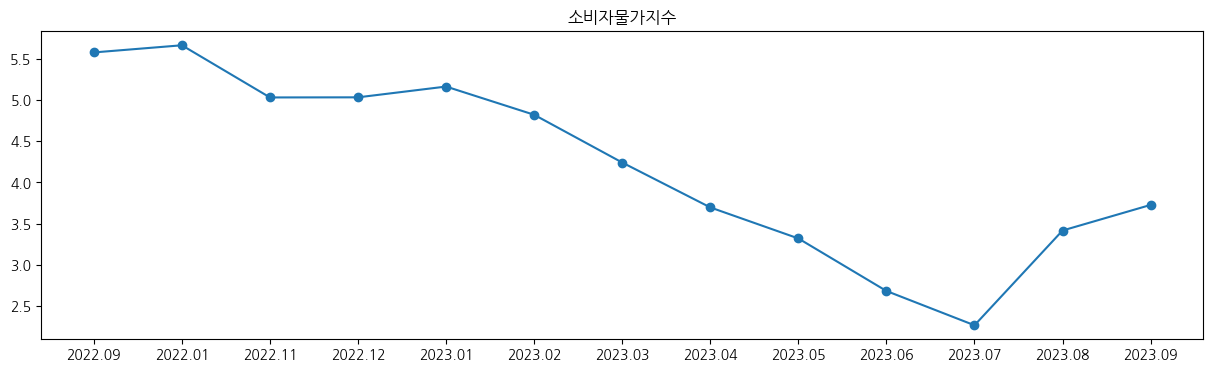

In [20]:
plt.figure(figsize=(15, 4))
plt.plot(df_price_notnan["시점"], df_price_notnan["전년동월대비"], marker="o")
plt.title("소비자물가지수")
plt.show()

[0.         5.58301832]
[1.         5.67005322]
[2.         5.03514008]
[3.         5.03652441]
[4.         5.16763779]
[5.         4.82431149]
[6.         4.24288139]
[7.         3.69677117]
[8.         3.31907772]
[9.         2.67972648]
[10.          2.26227699]
[11.          3.41557724]
[12.          3.72716423]


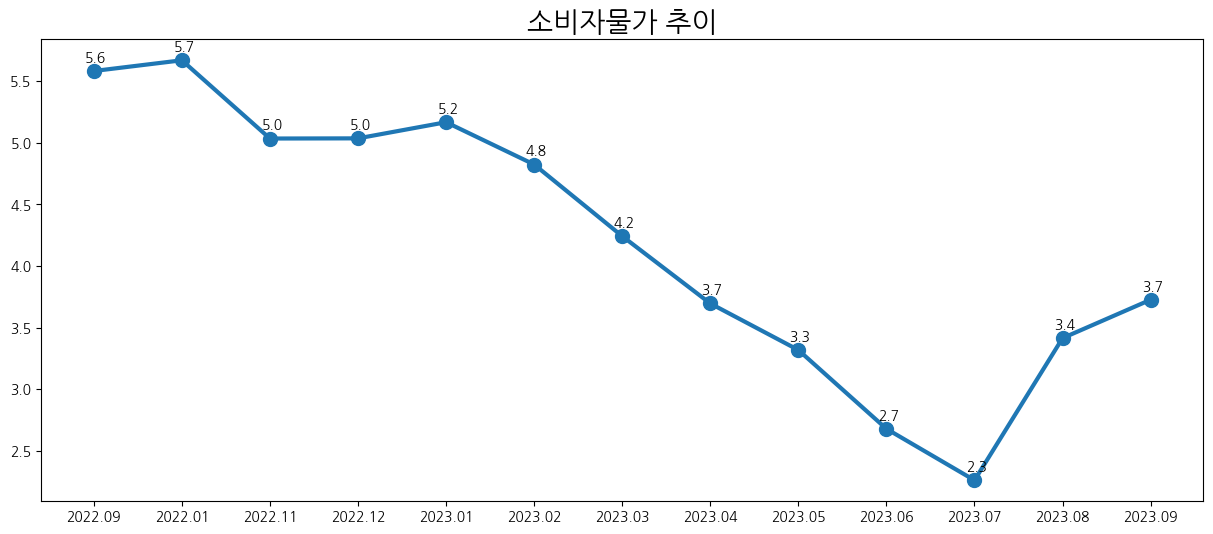

In [29]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot()

line_plot = ax.plot(df_price_notnan['시점'],
                    df_price_notnan['전년동월대비'],
                    marker = 'o',
                    markersize = 10 ,
                    linewidth = 3)

line_plot = line_plot[0]

for price_index in list(line_plot.get_xydata()):
  print(price_index)
  ax.text(x=price_index[0] - 0.1, y=price_index[1] + 0.075, s=f"{price_index[1]:.1f}")

plt.title('소비자물가 추이', fontsize=20)
plt.show()